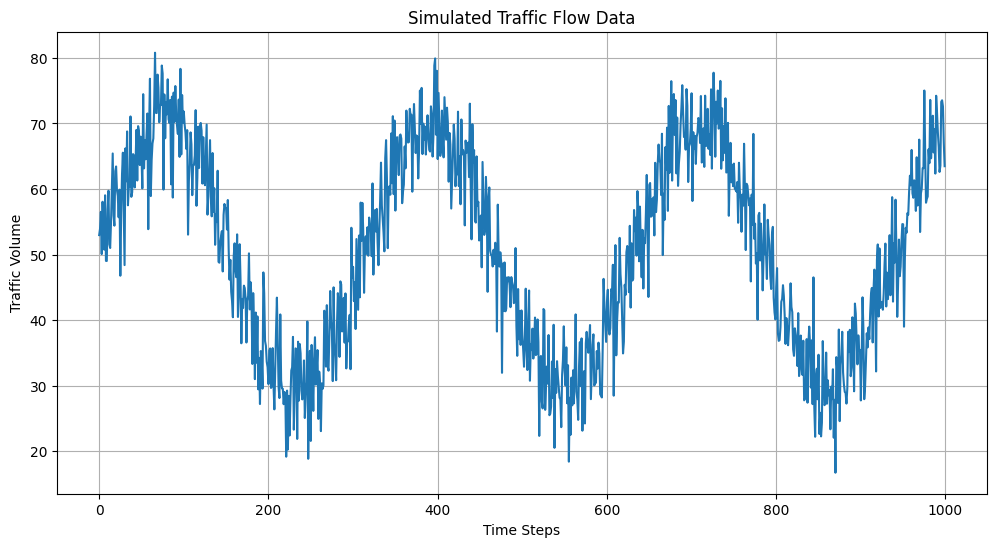

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


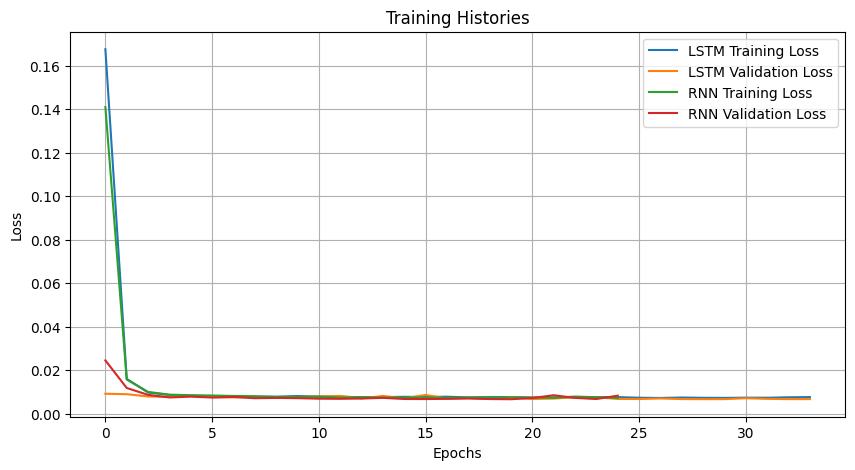

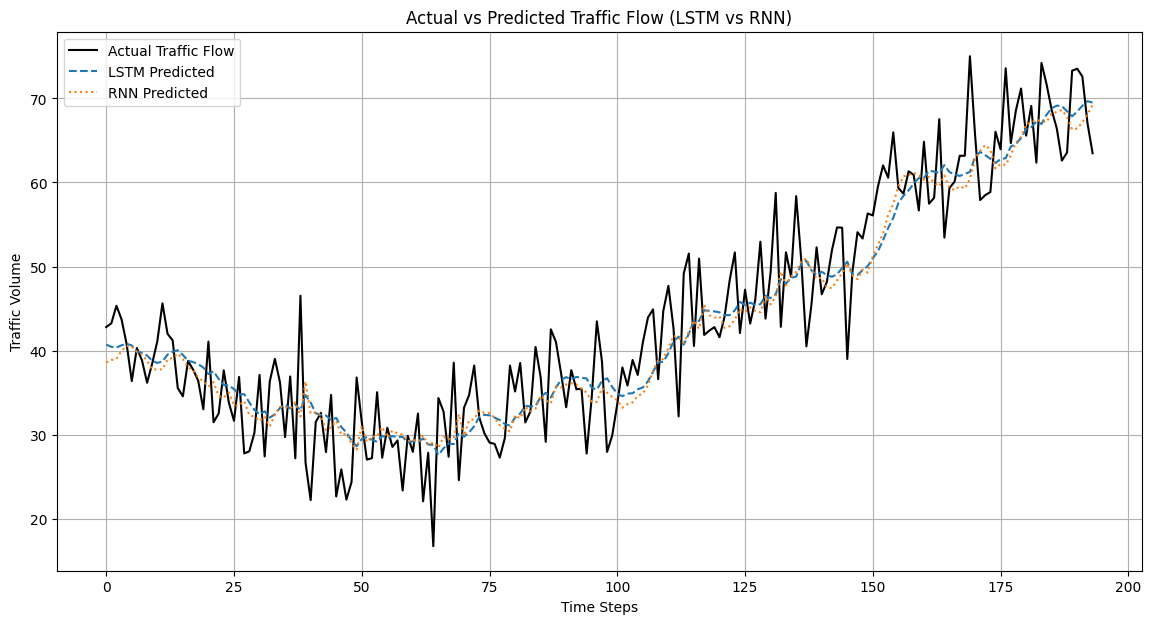


LSTM Confusion Matrix:


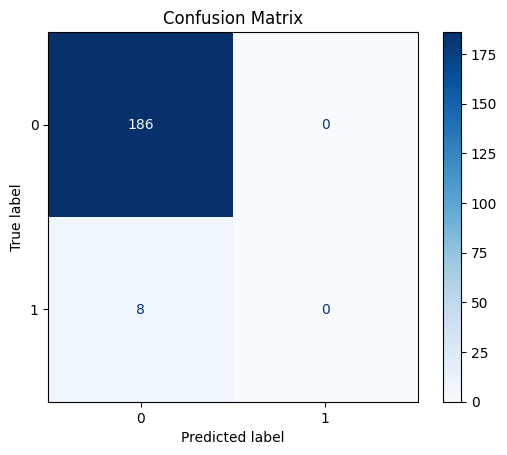


Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       186
           1       0.00      0.00      0.00         8

    accuracy                           0.96       194
   macro avg       0.48      0.50      0.49       194
weighted avg       0.92      0.96      0.94       194


RNN Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


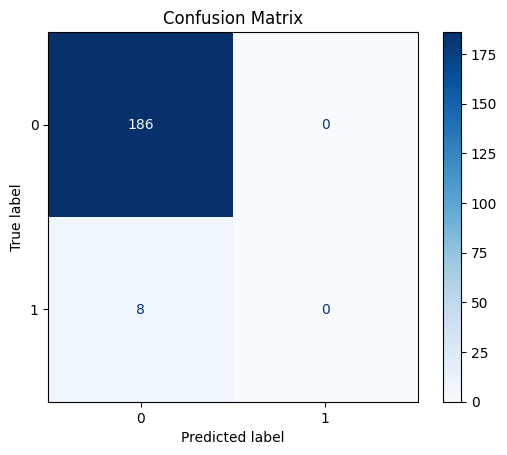


Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       186
           1       0.00      0.00      0.00         8

    accuracy                           0.96       194
   macro avg       0.48      0.50      0.49       194
weighted avg       0.92      0.96      0.94       194



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
# Install required libraries if not already installed
!pip install -q seaborn

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import os
import matplotlib.animation as animation

# 1. Simulate or Load Traffic Flow Data
def load_traffic_data():
    time_steps = 1000
    data = 50 + 20*np.sin(np.linspace(0, 20, time_steps)) + np.random.normal(0, 5, time_steps)
    return data

# 2. Preprocessing Data
def preprocess_data(data, window_size=30):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])

    X = np.array(X)
    y = np.array(y)
    return X, y, scaler

# 3. Build Model (RNN or LSTM)
def build_model(input_shape, model_type="LSTM"):
    model = Sequential()
    if model_type == "RNN":
        model.add(SimpleRNN(64, activation='relu', input_shape=input_shape))
    elif model_type == "LSTM":
        model.add(LSTM(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# 4. Train and Evaluate Model
def train_and_evaluate(X_train, X_test, y_train, y_test, model_type="LSTM"):
    model = build_model((X_train.shape[1], X_train.shape[2]), model_type)
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_pred = model.predict(X_test)
    return model, history, y_pred

# 5. Plot Training Histories
def plot_training_histories(histories, labels):
    plt.figure(figsize=(10,5))
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Training Loss')
        plt.plot(history.history['val_loss'], label=f'{label} Validation Loss')
    plt.title("Training Histories")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# 6. Confusion Matrix Analysis
def confusion_matrix_analysis(y_true, y_pred_binary):
    cm = confusion_matrix(y_true, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred_binary))

# ====================
# Main Execution
# ====================

# Load and Preprocess Data
data = load_traffic_data()

# Visualize Initial Traffic Data
plt.figure(figsize=(12,6))
plt.plot(data)
plt.title('Simulated Traffic Flow Data')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

window_size = 30
X, y, scaler = preprocess_data(data, window_size)

# Train-Test Split
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Train LSTM Model
lstm_model, lstm_history, lstm_y_pred = train_and_evaluate(X_train, X_test, y_train, y_test, model_type="LSTM")

# Train RNN Model
rnn_model, rnn_history, rnn_y_pred = train_and_evaluate(X_train, X_test, y_train, y_test, model_type="RNN")

# Plot Comparative Training History
plot_training_histories([lstm_history, rnn_history], ["LSTM", "RNN"])

# Inverse Transform for Actual Values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
lstm_y_pred_inv = scaler.inverse_transform(lstm_y_pred).flatten()
rnn_y_pred_inv = scaler.inverse_transform(rnn_y_pred).flatten()

# Plot Actual vs Predicted
plt.figure(figsize=(14,7))
plt.plot(y_test_inv, label='Actual Traffic Flow', color='black')
plt.plot(lstm_y_pred_inv, label='LSTM Predicted', linestyle='--')
plt.plot(rnn_y_pred_inv, label='RNN Predicted', linestyle=':')
plt.title('Actual vs Predicted Traffic Flow (LSTM vs RNN)')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix Analysis (Threshold 70)
threshold_value = 70

# Convert actual values to binary (0/1)
y_test_binary = (y_test_inv > threshold_value).astype(int)

# Also threshold predictions
lstm_y_pred_binary = (lstm_y_pred_inv > threshold_value).astype(int)
rnn_y_pred_binary = (rnn_y_pred_inv > threshold_value).astype(int)

# LSTM Confusion Matrix
print("\nLSTM Confusion Matrix:")
confusion_matrix_analysis(y_test_binary, lstm_y_pred_binary)

# RNN Confusion Matrix
print("\nRNN Confusion Matrix:")
confusion_matrix_analysis(y_test_binary, rnn_y_pred_binary)